AIM:-
Implement regression algorithms: (a)linear regression(b)logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
#preprocessing section
x = df.iloc[:,:-1].values
y = df.iloc[:,11].values

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [4]:
def helper(row):
    if row.quality < 4.5:
        return 0
    elif row.quality < 6.5 and row.quality >4.5:
        return 1
    else:
        return 2
df["quality"] = df.apply(helper,axis=1)
df['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

In [5]:
X = df.drop('quality',axis=1)
Y = df[['quality']]
print(X.columns)
print(Y.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['quality'], dtype='object')


In [6]:
new_df = df.drop(df[df["fixed acidity"] >= 10.3 ].index)
new_df = df.drop(df[df["volatile acidity"] >= 0.90552].index)
new_df = df.drop(df[df["citric acid"] >= 1].index)
new_df = df.drop(df[df["residual sugar"] >= 49.05].index)
new_df = df.drop(df[df["chlorides"] >= 0.245].index)
new_df = df.drop(df[df["free sulfur dioxide"] >= 124.412].index)
new_df = df.drop(df[df["total sulfur dioxide"] >=303.46].index)

cond_den_1 = df["density"] >= 1.024935
cond_den_2 = df["density"] <= 0.991
new_df = df.drop(df[cond_den_1 | cond_den_2].index)

cond_ph_1 = df["pH"] >= 3.8
cond_ph_2 = df["pH"] <= 2.8
new_df = df.drop(df[cond_ph_1 | cond_ph_2].index)

new_df = df.drop(df[df["sulphates"] >= 0.98103].index)
new_df = df.drop(df[df["alcohol"] >= 14].index)

print("Shape after removing the outliers...")
new_df.shape

Shape after removing the outliers...


(4891, 12)

In [7]:
scaler = RobustScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)
print("The shape after train/test split and scaling...")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

The shape after train/test split and scaling...
(4408, 11)
(490, 11)
(4408,)
(490,)


In [8]:
models_accuracy = dict() # initialising an empty dictionary to add all the models' accuracy scores

In [9]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
models_accuracy["Logistic Regression"] = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print("prediction for data::\n"+str(y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.77      0.85       437
           2       0.29      0.60      0.39        53

    accuracy                           0.76       490
   macro avg       0.41      0.46      0.41       490
weighted avg       0.87      0.76      0.80       490

prediction for data::
[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Coefficients: 
 [ 0.04069879 -0.07577367 -0.00229837  0.35168622 -0.00305288  0.04137032
  0.00593704 -0.37366635  0.06756457  0.04592905  0.11853939]
Mean squared error: 0.19
Coefficient of determination: 0.21


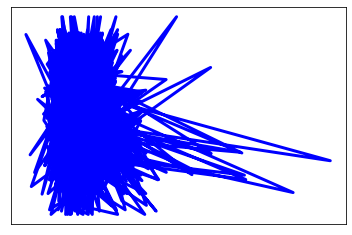

In [10]:
#Linear Regression
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()